<a href="https://colab.research.google.com/github/ismailkaya83/MY-DEEP-LEARNING-NOTEBOOKS/blob/master/Working_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Different ways to build Keras models**

## **The Sequential model**

The simplest way to build a Keras model is the Sequential model, which you already know about:

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
model = keras.Sequential([layers.Dense(64, activation='relu'),
                          layers.Dense(10, activation='softmax')])

Note that it’s possible to build the same model incrementally, via the add() method, similar to the append() method of a Python list:



In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

As such, the Sequential model above does not have any weights until you actually call it on some data, or call its build() method with an input shape:

In [3]:
"at that point, the model is not built yet."
model.weights 

ValueError: ignored

In [4]:
"Builds the model - now the model will expect samples of shape (3,). The None in the input shape signals that the batch size could be anything"

model.build(input_shape=(None, 3))

In [5]:
"Now you can retrieve the models weights"

model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.11494571,  0.22538054,  0.24964541,  0.0039157 ,  0.14090368,
         -0.11898553, -0.27292162, -0.12994   , -0.24753763,  0.12144703,
         -0.13625504, -0.04066262,  0.2537604 ,  0.00642961,  0.2769897 ,
         -0.06777006, -0.15532856, -0.2594465 ,  0.26758254,  0.17962798,
         -0.08650954,  0.0437583 , -0.21816331, -0.18126714,  0.24082875,
          0.29513305,  0.12544063,  0.11352098, -0.21374756,  0.2444483 ,
         -0.11366145,  0.11595961, -0.1927174 , -0.04040906,  0.24449855,
         -0.10768867, -0.02199206,  0.03374663,  0.0649935 , -0.19110566,
         -0.27618775,  0.1772955 ,  0.2273485 , -0.28733158, -0.1696223 ,
         -0.28819337,  0.21978521,  0.05413836, -0.17228535,  0.29322857,
         -0.28219715,  0.08875227, -0.1931467 , -0.22870362,  0.13863304,
         -0.03316113,  0.29649228,  0.15838695, -0.02622253, -0.05406879,
          0.10122108,  0.15044546,  0.16152

After the model is built, you can display its contents via the summary() method, which comes handy for debugging:



In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


As you can see your model happens to be named "sequential_1". You can actually give names to everything in Keras — every model, every layer. Like this:



In [9]:
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


When building a Sequential model incrementally, it’s useful to be able to print a summary of what the current model looks like after you add each layer. But you can’t print a summary until the model is built! There’s actually a way to have your Sequential get built on the fly: just declare the shape of the model’s inputs in advance. You can do this via the Input class:



In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))

Now you use summary() to follow how the output shape of your model changes as you add more layers:



In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## **The Functional API**

The Sequential model is easy to use, but its applicability is extremely limited: it can only express models with a single input and a single output, applying one layer after the other in a sequential fashion. In practice, it’s pretty common to encounter models with multiple inputs (say, an image and its metadata), multiple outputs (different things you want to predict about the data), or non-linear topologies.

In such cases, you’d build your model using the Functional API. This is what most Keras models you’ll encounter in the wild use. It’s fun and powerful — it feels like playing with LEGO bricks.

In [ ]:
"A simple example"

inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name='my_input')

This inputs object holds information about the shape and dtype of the data that the model will process:



In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

We call such an object a "symbolic tensor". It doesn’t contain any actual data, but it encodes the specifications of the actual tensors of data that the model will see when you use it. It stands for future tensors of data.



In [13]:
features = layers.Dense(64, activation='relu')(inputs)

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Multi-input, multi-output models**

Let’s say you’re building a system for ranking customer support tickets by priority and routing them to their appropriate department. Your model has three inputs:

- The title of the ticket (text input)
- The text body of the ticket (text input)
- Any tags added by the user (categorical input, assumed here to be one-hot encoded)

Your model also has two outputs:

- The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
- The department that should handle the ticket (softmax output over the set of departments)

You can build this model in a few lines with the functional API:



In [17]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

"Define model inputs"
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

"Combine input features into a single tensor, features, by concatenating them"
features = layers.Concatenate()([title, text_body, tags])

"Apply intermediate layer to recombine input features into richer representations"
features = layers.Dense(64, activation='relu')(features)

"define model outputs"
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

"Create the model by specifying its inputs and outputs"
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

**Training a multi-input, multi-output model**

You can train your model in much the same way as you would train a Sequential model, by calling fit() with lists of input and output data following the same structure as what you passed to the Model() constructor.

In [18]:
import numpy as np

num_samples = 1280

# Dummy input data.
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# Dummy target data.
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='adam',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step - loss: 4.3271 - priority_loss: 0.3389 - department_loss: 3.9882 - priority_mean_absolute_error: 0.5024 - department_accuracy: 0.1742


If you don’t want to rely on input order (for instance because you have many inputs or outputs), you can also leverage the names you gave to the Input objects and to the output layers, and pass data via dictionaries:



In [19]:
model.compile(optimizer='adam',
              loss={'priority': 'mean_squared_error', 'department': 'categorical_crossentropy'},
              metrics={'priority': ['mean_absolute_error'], 'department': ['accuracy']})
model.fit({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
          {'priority': priority_data, 'department': department_data},
          epochs=1)
model.evaluate({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
               {'priority': priority_data, 'department': department_data})
priority_preds, department_preds = model.predict(
    {'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

40/40 [==============================] - 0s 5ms/step - loss: 3.2769 - priority_loss: 0.3389 - department_loss: 2.9380 - priority_mean_absolute_error: 0.5024 - department_accuracy: 0.2586


**The power of the Functional API: access to layer connectivity**

A Functional model is an explicit graph data structure. This make it possible to inspect how layers are connected and reuse previous graph nodes (which are layer outputs) as part of new models. It also nicely fits the "mental model" that most researchers use when thinking about a deep neural network: a graph of layers.

This enables two important use cases: model visualization, and feature extraction.

Let’s visualize the connectivity of the model we just defined (the topology of the model). You can plot a Functional model as a graph with the plot_model() utility:

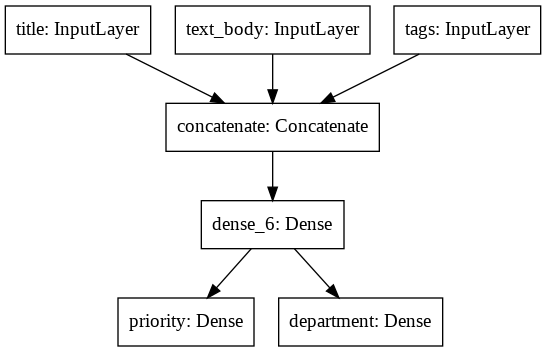

In [20]:
keras.utils.plot_model(model, "ticket_classifier.png")

You can add to this plot the input and output shapes of each layer in the model, which can be helpful during debugging:



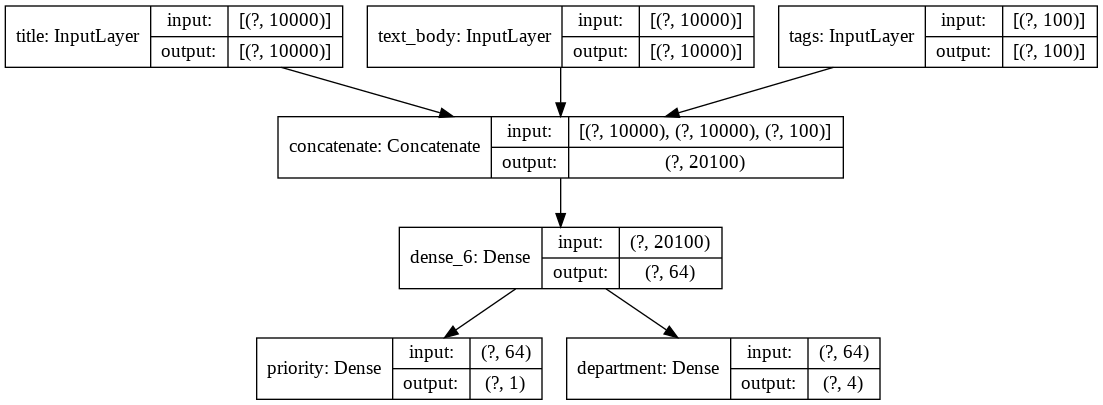

In [21]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Feature extraction with a Functional model**

Access to layer connectivity also means that you can inspect and reuse individual nodes (layer calls) in the graph. The model property model.layers provides the list of layers that make up the model, and for each layer you can query layer.input and layer.output:

In [22]:
model.layers

In [23]:
model.layers[3].input

[<tf.Tensor 'title:0' shape=(None, 10000) dtype=float32>,
 <tf.Tensor 'text_body:0' shape=(None, 10000) dtype=float32>,
 <tf.Tensor 'tags:0' shape=(None, 100) dtype=float32>]

In [24]:
model.layers[3].output

<tf.Tensor 'concatenate/concat:0' shape=(None, 20100) dtype=float32>

This enables you to do feature extraction: creating models that reuse intermediate features from another model.

Let’s say you want to add another output to the model we defined above — you want to also predict an estimate of how long a given issue ticket will take to resolve, a kind of difficulty rating. You could do this via a classification layer over 3 categories — "quick", "medium", "difficult". You don’t need to recreate and retrain a model from scratch! You can just start from the intermediate features of your previous model, since you have access to them. Like this:



In [27]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(
  inputs=[title, text_body, tags],
  outputs=[priority, department, difficulty])

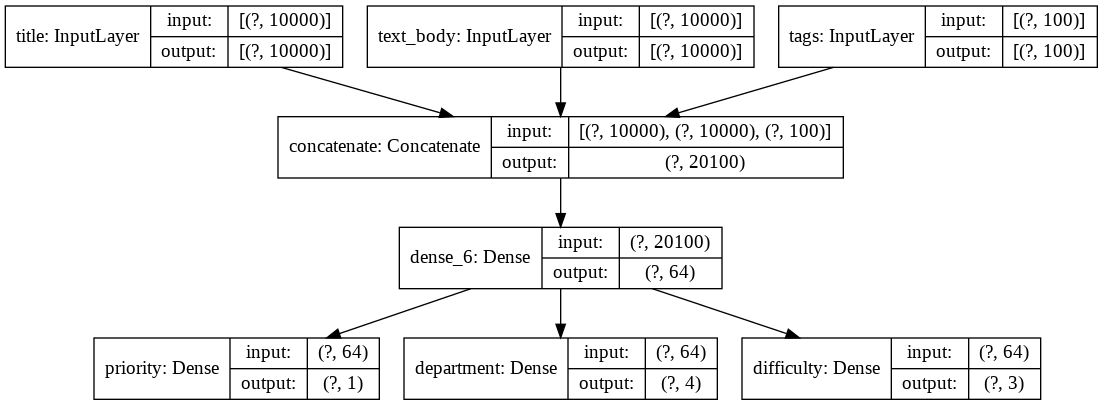

In [28]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

## **Subclassing the Model class**

The last model building pattern you should know about is the most advanced one: Model subclassing. You’ve already learned in chapter 3 how to subclass the Layer class to create custom layers. Subclassing Model is pretty similar:

- In the init method, define the layers the model will use.
- In the call method, define the forward pass of the model, reusing the layers previously created.
- Instantiate your subclass and call it on data to create its weights.

**Rewriting our previous example as a subclassed model**

Let’s take a look at a simple example: we will reimplement the customer support ticket management model using a Model subclass.

In [29]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super(CustomerTicketModel, self).__init__() # Dont forget to call the super constrcutor
        
        "define sublayers in the constructor"
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')

    "define the forward pass in the call() method"
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

Once you’ve defined the model, you can instantiate it. Note it will only create its weights the first time you call it on some data — much like Layer subclasses.



In [30]:
model = CustomerTicketModel(num_departments=4)

priority, department = model({'title': title_data, 
                              'text_body': text_body_data, 
                              'tags': tags_data})

**What is the difference between a Layer subclass and a Model subclass?**

It’s simple: a "layer" is a building block you use to create models, and a "model" is the top-level object that you will actually train, export for inference, etc. In short, a Model has a fit(), evaluate(), and predict() method. Layers don’t. Other than that, the two classes virtually identical (another difference is that you can save a model to a file on disk).

You can compile and train a Model subclass just like a Sequential or Functional model:



In [31]:
model.compile(optimizer='adam',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    {'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

40/40 [==============================] - 0s 5ms/step - loss: 3.6642 - output_1_loss: 0.3389 - output_2_loss: 3.3253 - output_1_mean_absolute_error: 0.5024 - output_2_accuracy: 0.4953


The Model subclassing workflow is the most flexible way to build a model: it enables you to build models that cannot be expressed as directed acyclic graphs of layer — imagine, for instance, a model where the call() method uses layers inside a for loop, or even calls them recursively. Anything is possible — you’re in charge.

**Beware: what subclassed models don’t support**

This freedom comes at a cost: with subclassed models, you are responsible for more of the model logic, which means your potential error surface is much larger. As a result, you will have more debugging work to do. You are developing a new Python object, not just snapping together LEGO bricks.

Functional and subclassed models are also substantially different in nature: a Functional model is an explicit data structure — a graph of layers, which you can view, inspect, and modify. Meanwhile, a subclassed model is a piece of byte code — a Python class with a call() method that contains raw code. This is the source of the subclassing workflow’s flexibility — you can just code up whatever functionality you like — but it introduces new limitations.

For instance, because the way layers are connected to each other is hidden inside the body of the call() method, you cannot access that information. Calling summary() will not display layer connectivity, and you cannot plot the model topology via plot_model(). Likewise, if you have a subclassed model, you cannot access the nodes of the graph of layers to do feature extraction — because there is simply no graph. Once the model is instantiated, its forward pass becomes a complete blackbox.

## **Mixing and matching different components**

Crucially, choosing one of these patterns — the Sequential model, the Functional API, Model subclassing — does not lock you out of the others. All models in the Keras API can smoothly interoperate with each other, whether they’re Sequential models, Functional models, or subclassed models written from scratch. They’re all part of the same spectrum of workflows.

For instance, you can use a subclassed Layer or Model in a Functional model:

In [33]:
class Classifier(keras.Model):

  def __init__(self, num_classes=2):
    super(Classifier, self).__init__()
    
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

Inversely, you can use a Functional model as part of a subclassed Layer or Model:



In [34]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

  def __init__(self, num_classes=2):
    super(MyModel, self).__init__()
    self.dense = layers.Dense(64, activation='relu')
    self.classifier = binary_classifier

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

In general, the Functional API provides you with a pretty good trade-off between easy-of-use and flexibility. It also gives you direct access to layer connectivity, which is very powerful for use cases such as model plotting or feature extraction. If you can use the Functional API — that is, if your model can be expressed as a directed acyclic graph of layers — I recommend using it over Model subclassing.

# **Using built-in training and evaluation loops**

In [21]:
from tensorflow.keras.datasets import mnist

"Create a model (we factor this into a seperate function so as to reuse it later)"
def get_mnist_model():
  inputs = keras.Input(shape=(28 * 28,))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation='softmax')(features)
  model = keras.Model(inputs, outputs)
  return model

"load your data, reserving some for validation"
(images, labels), (test_images, test_labels) = mnist.load_data()

images = images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

"compile the model by specifying its optimizer, the loss function to minimize, and metrics to monitor"
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

"Use fit() to train the model, optionally providing validation data to monitor performance on unseen data"
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2947 - accuracy: 0.9117 - val_loss: 0.1473 - val_accuracy: 0.9583
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1656 - accuracy: 0.9538 - val_loss: 0.1224 - val_accuracy: 0.9660
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9727


There are a few ways you can customize this simple workflow:

- Providing your own custom metrics
- Passing callbacks to the fit() method to schedule actions to be taken at specific points during training

## **Writing your own metrics**

A Keras metric is a subclass of the keras.metrics.Metric class. Similarly to layers, a metric has an internal state stored in TensorFlow variables. Unlike layers, these variables aren’t updated via backpropagation, so you have to write the state update logic yourself — which happens in the update_state() method.

In [31]:
import tensorflow as tf

"this is subclass the Metric class"
class RootMeanSquaredError(keras.metrics.Metric):

# Define the state variables in the constructor. Like for layers, you have access to the add_weight() method
    def __init__(self, name='rmse', **kwargs):
      super(RootMeanSquaredError, self).__init__(name=name, **kwargs)
      self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
      self.total_samples = self.add_weight(name='total_samples', initializer='zeros', dtype='int32')

# implement the state update logic in update_state(). The y_true argument is the targets (or labels) for one batch,
# while y_pred represents the correspondings predictions from the model. To match our MNIST model, we expect categorical 
# predictions and integer labels. You can ignore the sample_weight argument, we wont use it here

    def update_state(self, y_true, y_pred, sample_weight=None):
      y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
      mse = tf.reduce_sum(tf.square(y_true - y_pred))
      self.mse_sum.assign_add(mse)
      num_samples = tf.shape(y_pred)[0]
      self.total_samples.assign_add(num_samples)

You use the result() method to return the current value of the metric:



In [32]:
def result(self):
  return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

Meanwhile, you also need to expose a way to reset the metric state without having to re-instantiate it — this enables the same metric objects to be used across different epochs of training or across both training and evaluation. You do this is the reset_states() method:



In [33]:
def reset_states(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

Custom metrics can be used just like built-in ones. Let’s test-drive our own metric:



In [35]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

TypeError: ignored

## **Using Callbacks**

Launching a training run on a large dataset for tens of epochs using model.fit() can be a bit like launching a paper airplane: past the initial impulse, you dont have any control over its trajectory or its landing spot. If you want to avoid bad outcomes (and thus wasted paper airplanes), it’s smarter to use not a paper plane, but a drone that can sense its environment, send data back to its operator, and automatically make steering decisions based on its current state. The Keras callbacks API will help you transform your call to model.fit() from a paper airplane into a smart, autonomous drone that can self-introspect and dynamically take action.

A callback is an object (a class instance implementing specific methods) that is passed to the model in the call to fit() and that is called by the model at various points during training. It has access to all the available data about the state of the model and its performance, and it can take action: interrupt training, save a model, load a different weight set, or otherwise alter the state of the model.

In [ ]:
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

When you’re training a model, there are many things you can’t predict from the start. In particular, you can’t tell how many epochs will be needed to get to an optimal validation loss. Our examples so far have adopted the strategy of training or enough epochs that you begin overfitting, using the first run to figure out the proper number of epochs to train for, and then finally launching a new training run from scratch using this optimal number. Of course, this approach is wasteful. A much better way to handle this is to stop training when you measure that the validation loss is no longer improving. This can be achieved using the EarlyStopping callback.

The EarlyStopping callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs. For instance, this callback allows you to interrupt training as soon as you start overfitting, thus avoiding having to retrain your model for a smaller number of epochs. This callback is typically used in combination with ModelCheckpoint, which lets you continually save the model during training (and, optionally, save only the current best model so far: the version of the model that achieved the best performance at the end of an epoch):

In [36]:
"callbacks are passed to the model via the callbacks argument in fit(), which takes a list of callbacks. You can pass any number of callbacks"
callbacks_list = [
    "interrupts training when improvement stops"
    keras.callbacks.EarlyStopping(
        monitor='accuracy', # monitors the models validation accuracy
        patience=1, #interrupts training when accuracy has stopped improvig for more than one epoch
    ),
    keras.callbacks.ModelCheckpoint( #saves the current weights after every epoch
        filepath='my_checkpoint_path', # path to the destination model file
        monitor='val_loss', #these two arguments mean you wont overwrite the model file unless val_loss has improved,
        save_best_only=True, #which allows ypu to keep the best model seen during training
    )
]
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # your monitor accuracy, so it should be part of the models metrics
"note that because the callback will monitor validation loss and validation accuracy, you need to pass valisation_data to the call to fit()"
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1550/1563 [============================>.] - ETA: 0s - loss: 0.2944 - accuracy: 0.9110WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_checkpoint_path/assets
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2939 - accuracy: 0.9112 - val_loss: 0.1475 - val_accuracy: 0.9593
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1701 - accuracy: 0.9524 - val_loss: 0.1294 - val_accuracy: 0.9650
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1428 - accuracy

Note that you can always save models manually after training as well — just call model.save('my_checkpoint_path'). To reload the model you’ve saved, just use:



In [ ]:
model = keras.models.load_model('my_checkpoint_path')

## **Writing your own callbacks**

If you need to take a specific action during training that isn’t covered by one of the built-in callbacks, you can write your own callback. Callbacks are implemented by subclassing the class keras.callbacks.Callback. You can then implement any number of the following transparently-named methods, which are called at various points during training:



In [ ]:
on_epoch_begin(epoch, logs) #called at the start of every epoch
on_epoch_end(epoch, logs) #called at the end of every epoch
on_batch_begin(batch, logs) #called right before processing each batch
on_batch_end(batch, logs) #called right after processing each batch
on_train_begin(logs) #called at the start of training
on_train_end(logs) #called at the end of training

These methods all are called with a logs argument, which is a dictionary containing information about the previous batch, epoch, or training run: training and validation metrics, and so on. The on_epoch_* and on_batch_* methods also take the epoch or batch index as first argument (an integer).

Here’s a simple example saving a list of per-batch loss values during training, and saves a graph of these values at the end of each epoch:



In [38]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label='Training loss for each batch')
        plt.xlabel('Batch (epoch %d)' % (epoch,))
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('plot_at_epoch_%d' % (epoch,))
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2924 - accuracy: 0.9136 - val_loss: 0.1488 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1612 - accuracy: 0.9549 - val_loss: 0.1253 - val_accuracy: 0.9653
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1368 - accuracy: 0.9628 - val_loss: 0.1149 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1231 - accuracy: 0.9678 - val_loss: 0.1039 - val_accuracy: 0.9735
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1142 - accuracy: 0.9712 - val_loss: 0.1077 - val_accuracy: 0.9758
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1095 - accuracy: 0.9733 - val_loss: 0.1132 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1033 - accuracy: 0.9753 - val_loss: 0.1164 - val_accuracy:

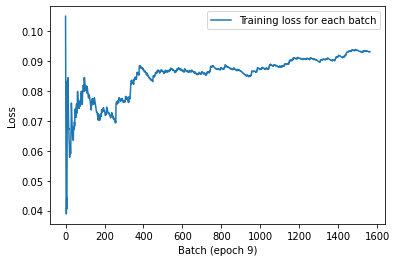

In [39]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

## **Monitoring and visualization with TensorBoard**

To do good research or develop good models, you need rich, frequent feedback about what’s going on inside your models during your experiments. That’s the point of running experiments: to get information about how well a model performs—as much information as possible. Making progress is an iterative process, or loop: you start with an idea and express it as an experiment, attempting to validate or invalidate your idea. You run this experiment and process the information it generates. This inspires your next idea. The more iterations of this loop you’re able to run, the more refined and powerful your ideas become. Keras helps you go from idea to experiment in the least possible time, and fast GPUs can help you get from experiment to result as quickly as possible. But what about processing the experiment results? That’s where TensorBoard comes in.

TensorBoard is a browser-based application that you can run locally. It’s the best way to monitor everything that goes on inside your model during training. With TensorBoard, you can:

- Visually monitor metrics during training
- Visualize your model architecture
- Visualize histograms of activations and gradients
- Explore embeddings in 3D

If you’re monitoring more information than just the model’s final loss, you can develop a clearer vision of what the model does and doesn’t do, and you can make progress more quickly.

The easiest way to use TensorBoard with a Keras model and the fit method is the keras.callbacks.TensorBoard callback.

In the simplest case, just specify where you want the callback to write logs, and you’re good to go:



In [41]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = keras.callbacks.TensorBoard(
    log_dir='/full_path_to_your_logs',
)
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
   1/1563 [..............................] - ETA: 0s - loss: 2.2617 - accuracy: 0.0938WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.9122 - val_loss: 0.1485 - val_accuracy: 0.9582
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1662 - accuracy: 0.9538 - val_loss: 0.1366 - val_accuracy: 0.9640
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9618 - val_loss: 0.1104 - val_accuracy: 0.9731
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9672 - val_loss: 0.1124 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 5s 3

Once the model starts running, it will write logs at the target location. If you are running you Python script on a local machine, you can then launch the local TensorBoard server using the following command (note that the tensorboard executable should be already available if you have installed TensorFlow via pip; if not, you can install TensorBoard manually via pip install tensorboard).



In [ ]:
tensorboard --logdir /full_path_to_your_logs

You can then navigate to the URL that the command returns to access the TensorBoard interface.

If you are running your script in a Colab notebook, you can run an embedded TensorBoard instance as part of your notebook, using the following commands:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_logs